In [50]:
#importing all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', '{:.2f}'.format)

In [51]:
#importing the dataset from excel file

data = pd.read_excel('housing_prices.xlsx')
data.head(5)

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Age_of_House,House_Price
0,1660,1,2,38,769899.26
1,4572,3,2,14,1598878.44
2,3892,4,3,28,1326074.93
3,1266,2,1,28,235649.75
4,4244,4,2,10,1428993.42


In [52]:
#checking the characteristics of the content including the missing data (if there's any)

print('Descriptive Statistics:')
data.describe()

# table shows irregular data with negative in the house price, does it mean its free?

Descriptive Statistics:


,Square_Feet,Num_Bedrooms,Num_Bathrooms,Age_of_House,House_Price
count,500.00,500.00,500.00,500.00,500.00
mean,2989.92,2.95,1.97,24.41,984161.45
std,1184.26,1.43,0.82,14.65,424560.62
min,804.00,1.00,1.00,0.00,-152537.36
25%,1953.00,2.00,1.00,12.00,702807.53
50%,3046.00,3.00,2.00,24.00,972915.44
75%,3993.75,4.00,3.00,37.00,1312144.05
max,4999.00,5.00,3.00,49.00,2052847.37


In [53]:
#checking the correlation of the variable
data_corr = data.corr()
print(data_corr)

               Square_Feet  Num_Bedrooms  Num_Bathrooms  Age_of_House  \
Square_Feet           1.00         -0.01          -0.01         -0.00   
Num_Bedrooms         -0.01          1.00           0.04          0.05   
Num_Bathrooms        -0.01          0.04           1.00          0.01   
Age_of_House         -0.00          0.05           0.01          1.00   
House_Price           0.85          0.03           0.04         -0.05   

               House_Price  
Square_Feet           0.85  
Num_Bedrooms          0.03  
Num_Bathrooms         0.04  
Age_of_House         -0.05  
House_Price           1.00  


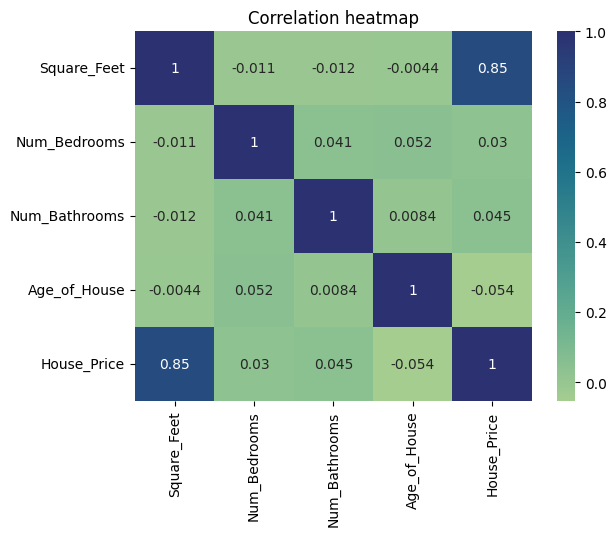

In [54]:
#visualize the correlation using heatmap for better understanding
sns.heatmap(data_corr, annot = True, cmap = 'crest')
plt.title('Correlation heatmap')
plt.show()

#the result shows that square feet and house price have a strong positive relationship. this may suggest that as square feet increase, price of house also increases. 

In [55]:
#assigning the variables 
square_feet = data['Square_Feet'] #independent variable
house_price = data['House_Price'] #dependent variable

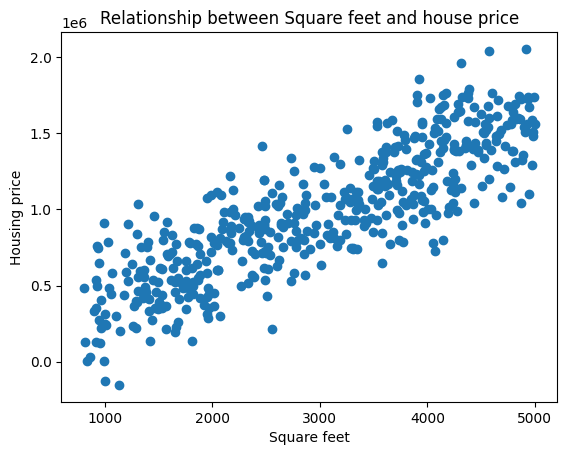

In [56]:
#plotting the variables using scatter plot ensuring the linear relationship
plt.scatter(square_feet, house_price)
plt.title('Relationship between Square feet and house price')
plt.xlabel('Square feet')
plt.ylabel('Housing price')
plt.show()

In [57]:
#splitting the for train and test dataset
square_feet_train, square_feet_test, house_price_train, house_price_test = train_test_split(square_feet, house_price, test_size = .2, random_state = 45)

In [58]:
#adding constant to the independent variable
square_feet_constant = sm.add_constant(square_feet)

In [59]:
#fitting the model
model = sm.OLS(house_price, square_feet_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1275.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          1.89e-139
Time:                        20:56:50   Log-Likelihood:                -6870.9
No. Observations:                 500   AIC:                         1.375e+04
Df Residuals:                     498   BIC:                         1.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.514e+04   2.74e+04      2.745      

In [60]:
#calculating the residuals
predictions = model.predict(square_feet_constant)
residuals = house_price - predictions

In [61]:
#calculating the RMSE
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse}")

RMSE: 224754.44494133038


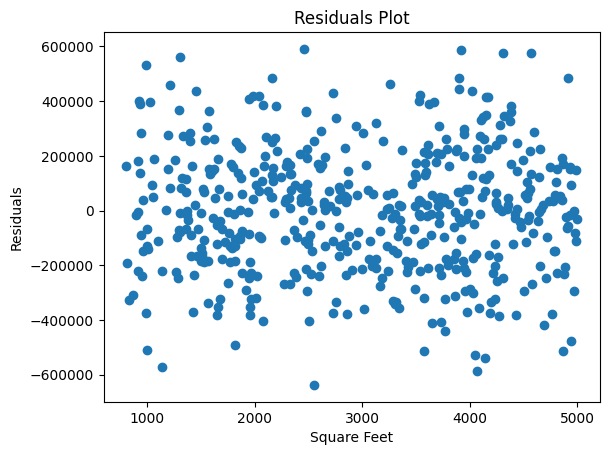

In [64]:
#plotting the residuals

plt.scatter(square_feet, residuals)
plt.title('Residuals Plot')
plt.xlabel('Square Feet')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Based on the R-squared value, the model indicates that square footage accounts for 71.9% of the variation in housing prices.
# On average, the model's predictions differ from the actual values by approximatel 224,754.4449 

In [ ]:
# Question 1:  I think it just clearly shows that as the house is getting bigger, the price tends to increase as well.
# Question 2: The residuals appear randomly scattered around the horizontal axis, with no obvious curve or funnel pattern. This suggests that the relationship between house size and price can be well-approximated by a straight line. if the model shows signs of non-linearity, you may consider logarithmic transformation or non-linear model instead of linear regression.